<a href="https://colab.research.google.com/github/Shayankr/AI_and_ComputerVision/blob/master/NN_MNIST_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

In [2]:
# Training
# 1. Get data
from tensorflow.keras.datasets import mnist

In [3]:
# x - input - images 
# y - output - labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(f"Shape of x_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")

Shape of x_train (60000, 28, 28)
Shape of y_train (60000,)


In [5]:
print(f"Shape of x_test {x_test.shape}")
print(f"Shape of y_test {y_test.shape}")

Shape of x_test (10000, 28, 28)
Shape of y_test (10000,)


7


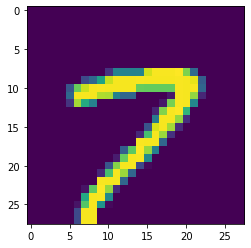

In [6]:
plt.imshow(x_train[123])
print(y_train[123])

In [7]:
# 2. Prepare the data 
# 2.1 Normalize the data - Bring the complete data in a particular range (0-1 or -1 to +1)
# Max Normalization 
# x_train/ max(x_train)

alist = np.array([0,5,10,15,20])
alist/20

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [8]:
x_train = x_train / 255.0

In [9]:
x_train.shape

(60000, 28, 28)

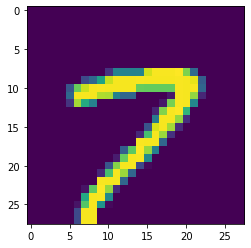

In [10]:
plt.imshow(x_train[123])

In [11]:
# 2.2 Process the outptut 
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
# Row  | A |  B  | C 
# A    | 1 |  0  | 0 
# B    | 0 |  1  | 0 
# C.   | 0 |  0  | 1
# A.   | 1 |  0  | 0
# B    | 0 |  1  | 0 

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train = to_categorical(y_train)

In [15]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
# 3. Make model 
# Using Keras build an NN model

In [17]:
#affine - w1x1 + w2X2 + b1

In [18]:
# weights - neurons in previous layer * neurons in current layer 
# bias - neurons in curent layer

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [20]:
# Create the model and do a Feed Forward
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation=relu))
model.add(Dense(10, activation=softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
(784*512) + 512 # Model capacity

401920

In [22]:
28*28

784

In [23]:
# Select the error mechanism & Back prop opt algo
model.compile(optimizer=SGD(learning_rate=0.01), 
              loss=categorical_crossentropy, 
              metrics=["acc"])

In [24]:
# start training
model_history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=200, validation_split=0.2) # 80% for training

Epoch 1/200
750/750 [==============================] - 5s 5ms/step - loss: 0.9956 - acc: 0.7594 - val_loss: 0.5075 - val_acc: 0.8751
Epoch 2/200
750/750 [==============================] - 5s 6ms/step - loss: 0.4624 - acc: 0.8804 - val_loss: 0.3815 - val_acc: 0.8972
Epoch 3/200
750/750 [==============================] - 4s 6ms/step - loss: 0.3809 - acc: 0.8947 - val_loss: 0.3391 - val_acc: 0.9049
Epoch 4/200
750/750 [==============================] - 5s 6ms/step - loss: 0.3424 - acc: 0.9040 - val_loss: 0.3110 - val_acc: 0.9131
Epoch 5/200
750/750 [==============================] - 4s 5ms/step - loss: 0.3177 - acc: 0.9100 - val_loss: 0.2923 - val_acc: 0.9175
Epoch 6/200
750/750 [==============================] - 4s 5ms/step - loss: 0.2991 - acc: 0.9148 - val_loss: 0.2779 - val_acc: 0.9229
Epoch 7/200
750/750 [==============================] - 3s 5ms/step - loss: 0.2839 - acc: 0.9192 - val_loss: 0.2662 - val_acc: 0.9264
Epoch 8/200
750/750 [==============================] - 4s 5ms/step - 

In [25]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

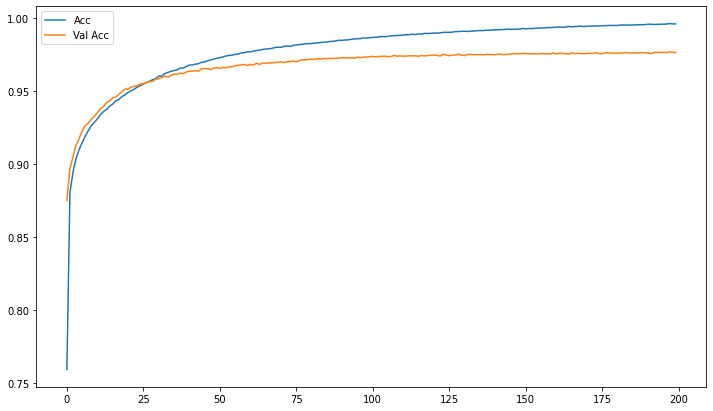

In [26]:
plt.figure(figsize=(12, 7))
plt.plot(model_history.history.get("acc"), label="Acc")
plt.plot(model_history.history.get("val_acc"), label="Val Acc")
plt.legend()
plt.show()

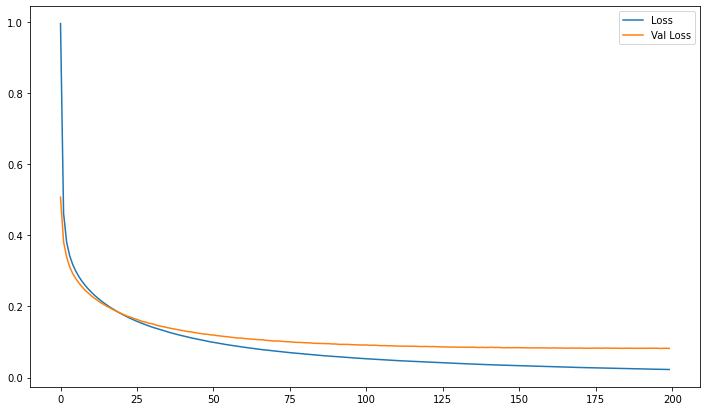

In [27]:
plt.figure(figsize=(12, 7))
plt.plot(model_history.history.get("loss"), label="Loss")
plt.plot(model_history.history.get("val_loss"), label="Val Loss")
plt.legend()
plt.show()

In [28]:
# Testing 
x_test = x_test / 255.0 
y_test = to_categorical(y_test)

In [29]:
model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 3ms/step - loss: 0.0713 - acc: 0.9786


[0.07127048820257187, 0.978600025177002]

In [30]:
# 0.07 - test_loss 
# 0.97 - test_acc

In [31]:
# Prediciton

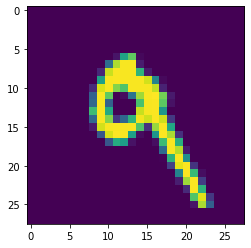

In [32]:
test_image = x_test[7]
plt.imshow(test_image)

In [33]:
#model.predict(test_image) will fail ?? why 

In [34]:
test_image.shape

(28, 28)

In [35]:
model.input_shape

(None, 28, 28)

In [36]:
# if 1 image is used for prediction then technically the shape of image should be (1, 28, 28)
# if 10 image is used for prediction then technically the shape of image should be (10, 28, 28)

In [37]:
test_image2 = np.expand_dims(test_image, axis=0)

In [38]:
test_image2.shape

(1, 28, 28)

In [39]:
result = model.predict(test_image2) # these are 10 probabilities for each digit... 
# we should take the one with highest probability
result

array([[1.0006566e-07, 8.6283071e-06, 4.1670024e-05, 5.9046492e-04,
        2.6131814e-04, 2.8122454e-06, 1.6361964e-08, 2.5193985e-05,
        2.0984640e-05, 9.9904877e-01]], dtype=float32)

In [40]:
np.argmax(result)

9

In [41]:
from tensorflow.keras.datasets import fashion_mnist

In [42]:
y_pred = model.predict(x_test)

In [43]:
np.argmax(y_pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [44]:
np.argmax(y_test, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [45]:
result = (np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))

In [46]:
np.where(result == False)

(array([   8,  149,  247,  321,  340,  381,  445,  449,  495,  582,  629,
         659,  684,  707,  720,  740,  965, 1014, 1032, 1107, 1112, 1128,
        1166, 1178, 1181, 1182, 1224, 1226, 1232, 1242, 1247, 1299, 1319,
        1328, 1378, 1393, 1444, 1494, 1500, 1522, 1530, 1549, 1553, 1581,
        1609, 1626, 1681, 1709, 1717, 1751, 1790, 1878, 1901, 1941, 1984,
        1987, 2016, 2018, 2024, 2033, 2035, 2043, 2044, 2052, 2053, 2098,
        2109, 2118, 2129, 2130, 2135, 2182, 2189, 2272, 2293, 2369, 2387,
        2395, 2406, 2422, 2454, 2488, 2514, 2597, 2607, 2648, 2654, 2720,
        2877, 2896, 2915, 2921, 2939, 2953, 3073, 3117, 3422, 3490, 3503,
        3520, 3549, 3558, 3597, 3718, 3727, 3757, 3767, 3780, 3808, 3811,
        3817, 3838, 3853, 3893, 3906, 3941, 3943, 3985, 4065, 4075, 4078,
        4163, 4176, 4199, 4201, 4224, 4248, 4271, 4289, 4294, 4497, 4536,
        4548, 4601, 4761, 4807, 4814, 4823, 4860, 4879, 4880, 4966, 4990,
        5199, 5331, 5457, 5600, 5642, 

Label was - 1
Model predicted - 1


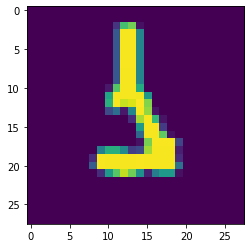

In [47]:
num = 1527
plt.imshow(x_test[num])
print(f"Label was - {np.argmax(y_test[num])}")
print(f"Model predicted - {np.argmax(y_pred[num])}")

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

array([[ 971,    0,    0,    1,    2,    2,    1,    1,    1,    1],
       [   0, 1122,    2,    1,    0,    1,    2,    2,    5,    0],
       [   4,    1, 1010,    1,    5,    0,    2,    6,    3,    0],
       [   1,    0,    4,  988,    0,    4,    0,    4,    7,    2],
       [   0,    0,    5,    1,  955,    0,    3,    3,    2,   13],
       [   2,    0,    0,    8,    0,  869,    7,    1,    3,    2],
       [   6,    3,    0,    0,    4,    4,  938,    1,    2,    0],
       [   1,    3,    8,    3,    0,    1,    0, 1004,    2,    6],
       [   3,    0,    3,    7,    4,    2,    3,    2,  950,    0],
       [   4,    3,    0,    5,    6,    2,    1,    5,    4,  979]])

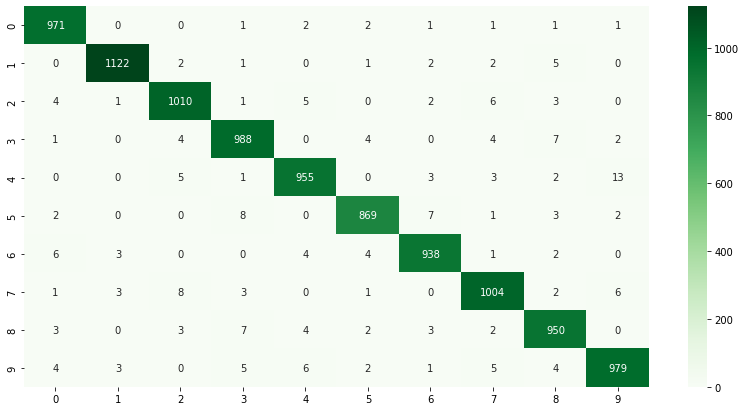

In [50]:
plt.figure(figsize=(14, 7))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)), annot=True, cmap="Greens", fmt='d')

END